# Je souhaite étudier le devenir des étudiants de la Miage Toulouse et comparer leur situation après diplomation avec un autre établissement

### Je récupère les données de l'insertion professionnelle des diplômés de Master en universités et établissements assimilés depuis le site du ministère

Le site https://www.data.gouv.fr/fr/datasets/insertion-professionnelle-des-diplomes-de-master-en-universites-et-etablissements-assimil-0/ propose les données de résultat d'enquête de 2012 à 2020.

Il est notamment possible d'y visualiser, par établissement, par domaine et par diplome les informations suivantes:


* salaire_net_median_des_emplois_a_temps_plein : Salaire net mensuel médian des emplois à temps plein

* taux_de_chomage_regional : Taux de chômage régional (INSEE : 4ème trimestre N+2)

* salaire_net_mensuel_median_regional : Salaire mensuel net médian des jeunes de 25 à 29 ans employés à temps plein dans les catégories cadre et professions intermédiaires (INSEE : DADS N)

* taux_dinsertion : Taux d'insertion

Je récupère les données JSON à l'aide du module requests

In [1]:
import requests
url = "https://www.data.gouv.fr/fr/datasets/r/1e252d82-7dc2-4ee5-b5cd-dd5a8683acb2"
r = requests.get(url)

Je récupère mes données depuis le format JSON vers un dictionnaire python

In [2]:
import json

monjson = json.loads(r.text)

Je fais une première analyse de ma structure de donnée

Combien de données il y a t'il dans ce fichier?

In [3]:
print(f"Il y a {len(monjson)} données dans le dictionnaire")

Il y a 19603 données dans le dictionnaire


Quelles est ma première entrée du dictionnaire?

In [4]:
print(monjson[0])

{'datasetid': 'fr-esr-insertion_professionnelle-master', 'recordid': 'cc5c1f29001394c4b096b4816e81dbb2e3b02e5a', 'fields': {'domaine': 'Sciences, technologies et santé', 'emplois_stables': '65', 'cle_disc': 'disc15_18', 'code_du_domaine': 'STS', 'annee': '2012', 'code_de_l_academie': 'A06', 'salaire_net_mensuel_regional_1er_quartile': '1400', 'emplois_cadre': '81', 'situation': '18 mois après le diplôme', 'taux_dinsertion': '95', 'femmes': '14', 'emplois_cadre_ou_professions_intermediaires': '95', 'salaire_brut_annuel_estime': '32600', 'taux_de_chomage_regional': '8.9', 'etablissementactuel': 'Université Clermont Auvergne (UCA)', 'discipline': "Sciences de l'ingénieur", 'salaire_net_median_des_emplois_a_temps_plein': '2090', 'poids_de_la_discipline': '14', 'diplome': 'MASTER LMD', 'salaire_net_mensuel_regional_3eme_quartile': '2020', 'emplois_a_temps_plein': '98', 'etablissement': 'Clermont-Ferrand 2 - Blaise Pascal', 'emplois_exterieurs_a_la_region_de_luniversite': '81', 'taux_de_repo

On peut afficher d'une manière plus jolie/agréable:

In [5]:
print(json.dumps(monjson[0], sort_keys=True, indent=4))

{
    "datasetid": "fr-esr-insertion_professionnelle-master",
    "fields": {
        "academie": "Clermont-Ferrand",
        "annee": "2012",
        "cle_disc": "disc15_18",
        "cle_etab": "Clermont-Ferrand 2 - Blaise Pascal_18",
        "code_de_l_academie": "A06",
        "code_de_la_discipline": "disc15",
        "code_du_domaine": "STS",
        "de_diplomes_boursiers": "41",
        "diplome": "MASTER LMD",
        "discipline": "Sciences de l'ing\u00e9nieur",
        "domaine": "Sciences, technologies et sant\u00e9",
        "emplois_a_temps_plein": "98",
        "emplois_cadre": "81",
        "emplois_cadre_ou_professions_intermediaires": "95",
        "emplois_exterieurs_a_la_region_de_luniversite": "81",
        "emplois_stables": "65",
        "etablissement": "Clermont-Ferrand 2 - Blaise Pascal",
        "etablissementactuel": "Universit\u00e9 Clermont Auvergne (UCA)",
        "femmes": "14",
        "id_paysage": "n1E6T",
        "nombre_de_reponses": "42",
        "

Quelles sont mes clés dans mon dictionnaire?

In [6]:
for key in monjson[0]:
    print(key)

datasetid
recordid
fields
record_timestamp


Le champ qui nous intéresse est donc le champ "fields" qui contient les données de l'établissement:

In [7]:
print(json.dumps(monjson[0]["fields"], sort_keys=True, indent=4))

{
    "academie": "Clermont-Ferrand",
    "annee": "2012",
    "cle_disc": "disc15_18",
    "cle_etab": "Clermont-Ferrand 2 - Blaise Pascal_18",
    "code_de_l_academie": "A06",
    "code_de_la_discipline": "disc15",
    "code_du_domaine": "STS",
    "de_diplomes_boursiers": "41",
    "diplome": "MASTER LMD",
    "discipline": "Sciences de l'ing\u00e9nieur",
    "domaine": "Sciences, technologies et sant\u00e9",
    "emplois_a_temps_plein": "98",
    "emplois_cadre": "81",
    "emplois_cadre_ou_professions_intermediaires": "95",
    "emplois_exterieurs_a_la_region_de_luniversite": "81",
    "emplois_stables": "65",
    "etablissement": "Clermont-Ferrand 2 - Blaise Pascal",
    "etablissementactuel": "Universit\u00e9 Clermont Auvergne (UCA)",
    "femmes": "14",
    "id_paysage": "n1E6T",
    "nombre_de_reponses": "42",
    "numero_de_l_etablissement": "0631525R",
    "poids_de_la_discipline": "14",
    "salaire_brut_annuel_estime": "32600",
    "salaire_net_median_des_emplois_a_temps_p

Je souhaite récupérer les données de l'établissement "Toulouse 1 - Capitole", pour la mention "Informatique", et le diplome "MASTER LMD"

In [8]:
def getResultPerYearFromEtablissement(monJson,etablissement,discipline,diplome,situation):
    # situation = 18 ou 30 mois
    donnees = []
    for data in monJson:
        field = data["fields"]
        if field["etablissement"] == etablissement and field["discipline"] == discipline and field["diplome"]==diplome and field["situation"][0:2] == situation:
            #print(json.dumps(field, sort_keys=True, indent=4))
            #newDico[int(field["annee"])] = int(field[idData])
            donnees.append(field)
    return donnees

resultToulouseCapitole18 = getResultPerYearFromEtablissement(monjson,"Toulouse 1 - Capitole","Informatique","MASTER LMD","18")
print(json.dumps(resultToulouseCapitole18[0], sort_keys=True, indent=4))
resultToulouseCapitole30 = getResultPerYearFromEtablissement(monjson,"Toulouse 1 - Capitole","Informatique","MASTER LMD","30")

{
    "academie": "Toulouse",
    "annee": "2020",
    "cle_disc": "disc16_18",
    "cle_etab": "Toulouse 1 - Capitole_18",
    "code_de_l_academie": "A16",
    "code_de_la_discipline": "disc16",
    "code_du_domaine": "STS",
    "de_diplomes_boursiers": "26.47",
    "diplome": "MASTER LMD",
    "discipline": "Informatique",
    "domaine": "Sciences, technologies et sant\u00e9",
    "emplois_a_temps_plein": "100",
    "emplois_cadre": "92",
    "emplois_cadre_ou_professions_intermediaires": "96",
    "emplois_exterieurs_a_la_region_de_luniversite": "30",
    "emplois_stables": "92",
    "etablissement": "Toulouse 1 - Capitole",
    "etablissementactuel": "Universit\u00e9 Toulouse Capitole",
    "femmes": "33",
    "id_paysage": "542Id",
    "nombre_de_reponses": "58",
    "numero_de_l_etablissement": "0311382J",
    "poids_de_la_discipline": "7",
    "salaire_brut_annuel_estime": "33500",
    "salaire_net_median_des_emplois_a_temps_plein": "ns",
    "salaire_net_mensuel_median_regional

Quel était le salaire net median des diplomés en 2012?

In [27]:
def afficherSalaireNetMedian(data,annee,mois): 
    for d in data:
        if d["annee"] == annee:
            salaire_net = d["salaire_net_median_des_emplois_a_temps_plein"]
            print(f"En {annee} le salaire net median des emplois à temps pleins des diplomés était de {salaire_net}€ après {mois} mois")
        
def recupererSalaireNetMedian(data,annee,mois): 
    for d in data:
        if d["annee"] == annee:
            salaire_net = d["salaire_net_median_des_emplois_a_temps_plein"]
            return salaire_net

afficherSalaireNetMedian(resultToulouseCapitole18,"2012","18")
afficherSalaireNetMedian(resultToulouseCapitole30,"2012","30")

En 2012 le salaire net median des emplois à temps pleins des diplomés était de 1940€ après 18 mois
En 2012 le salaire net median des emplois à temps pleins des diplomés était de 2060€ après 30 mois


Affichons le salaire pour toutes les années:

In [10]:
for data in resultToulouseCapitole18:
    afficherSalaireNetMedian(resultToulouseCapitole18,data["annee"],"18")

En 2020 le salaire net median des emplois à temps pleins des diplomés était de ns€ après 18 mois
En 2014 le salaire net median des emplois à temps pleins des diplomés était de 1930€ après 18 mois
En 2012 le salaire net median des emplois à temps pleins des diplomés était de 1940€ après 18 mois
En 2019 le salaire net median des emplois à temps pleins des diplomés était de 2110€ après 18 mois
En 2017 le salaire net median des emplois à temps pleins des diplomés était de 2080€ après 18 mois
En 2018 le salaire net median des emplois à temps pleins des diplomés était de 2160€ après 18 mois
En 2015 le salaire net median des emplois à temps pleins des diplomés était de 2000€ après 18 mois
En 2016 le salaire net median des emplois à temps pleins des diplomés était de 1980€ après 18 mois
En 2013 le salaire net median des emplois à temps pleins des diplomés était de 1900€ après 18 mois


Ce n'est pas parfait, on aurait préféré l'afficher dans l'ordre:

In [11]:
for year in range(2011,2021):
    afficherSalaireNetMedian(resultToulouseCapitole18,str(year),"18")
    afficherSalaireNetMedian(resultToulouseCapitole30,str(year),"30")

En 2011 le salaire net median des emplois à temps pleins des diplomés était de 2170€ après 30 mois
En 2012 le salaire net median des emplois à temps pleins des diplomés était de 1940€ après 18 mois
En 2012 le salaire net median des emplois à temps pleins des diplomés était de 2060€ après 30 mois
En 2013 le salaire net median des emplois à temps pleins des diplomés était de 1900€ après 18 mois
En 2013 le salaire net median des emplois à temps pleins des diplomés était de 2120€ après 30 mois
En 2014 le salaire net median des emplois à temps pleins des diplomés était de 1930€ après 18 mois
En 2014 le salaire net median des emplois à temps pleins des diplomés était de 1940€ après 30 mois
En 2015 le salaire net median des emplois à temps pleins des diplomés était de 2000€ après 18 mois
En 2015 le salaire net median des emplois à temps pleins des diplomés était de 2110€ après 30 mois
En 2016 le salaire net median des emplois à temps pleins des diplomés était de 1980€ après 18 mois
En 2016 le

Comment progresse le salaire entre 18 et 30 mois?

In [29]:
for year in range(2011,2021):
    s1 = recupererSalaireNetMedian(resultToulouseCapitole18,str(year),"18")
    s2 = recupererSalaireNetMedian(resultToulouseCapitole30,str(year),"30")
    if s1 != None and s1 != "ns":
        difference = int(s2)-int(s1)
        print(f"Le salaire a progressé de {difference} € en {year}")

Le salaire a progressé de 120 € en 2012
Le salaire a progressé de 220 € en 2013
Le salaire a progressé de 10 € en 2014
Le salaire a progressé de 110 € en 2015
Le salaire a progressé de 130 € en 2016
Le salaire a progressé de 190 € en 2017
Le salaire a progressé de 110 € en 2018
Le salaire a progressé de 70 € en 2019


Traçons l'évolution des salaires en sortie du diplome:

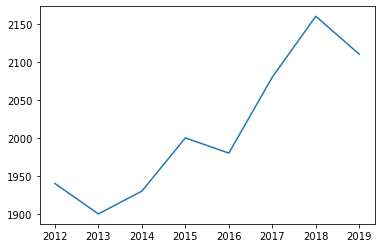

In [31]:
import matplotlib.pyplot as plt

def plotSalaire(data,situation):
    y = []
    x = []
    for year in range(2011,2021):
        s1 = recupererSalaireNetMedian(data,str(year),situation)
        if s1 != None and s1 != "ns" and s1 != "nd":
            y.append(int(s1))
            x.append(year)
    # plot
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.show()
    
plotSalaire(resultToulouseCapitole18,"18")

Et pour Bordeaux?

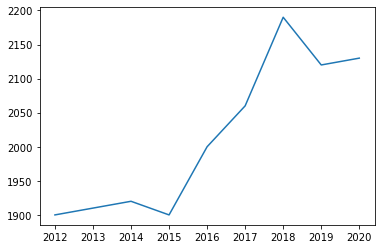

In [32]:
resultBordeaux18= getResultPerYearFromEtablissement(monjson,"Bordeaux","Informatique","MASTER LMD","18")
plotSalaire(resultBordeaux18,"18")

Et si on enregistrer nos résultats dans un fichier?

In [34]:
def saveData(filename, data, situation):
    with open(filename, "w") as my_file:
        for year in range(2011,2021):
            s1 = recupererSalaireNetMedian(data,str(year),situation)
            my_file.write(f"{year};{s1}\n")

saveData("UTC-18.csv",resultToulouseCapitole18,"18")
saveData("UTC-30.csv",resultToulouseCapitole30,"30")
saveData("Bordeaux-18.csv",resultBordeaux18,"18")

Et si on veut lire nos fichiers?

In [35]:
import os
def readFile(path):
    if os.path.exists(path):
        with open(path) as my_file:
            for line in my_file:
                print(line)
    else:
        print(f"Le fichier {path} n'existe pas")
        
readFile("UTC-18.csv")

2011;None

2012;1940

2013;1900

2014;1930

2015;2000

2016;1980

2017;2080

2018;2160

2019;2110

2020;ns

